In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [76]:
#Carga de datos
df = pd.read_csv (r'C:\Users\james\OneDrive\Documentos\PREGRADO UPAO\CICLO 9\Tesis I\Proyecto\BackEnds\EduForge\data\student_data.csv')

In [77]:
# Renombrar columnas
df.rename(columns={
        'school': 'escuela',
        'sex': 'sexo',
        'age': 'edad',
        'address': 'direccion',
        'famsize': 'tamano_familia',
        'Pstatus': 'estado_parental',
        'Medu': 'nivel_educativo_madre',
        'Fedu': 'nivel_educativo_padre',
        'Mjob': 'trabajo_madre',
        'Fjob': 'trabajo_padre',
        'reason': 'motivo_elegir_escuela',
        'guardian': 'tutor',
        'traveltime': 'tiempo_viaje',
        'studytime': 'tiempo_estudio',
        'failures': 'fracasos_anteriores',
        'schoolsup': 'apoyo_escolar',
        'famsup': 'apoyo_familiar',
        'paid': 'clases_pagas',
        'activities': 'actividades_extracurriculares',
        'nursery': 'jardin_infantil',
        'higher': 'interes_educacion_superior',
        'internet': 'acceso_internet',
        'romantic': 'relacion_romantica',
        'famrel': 'relacion_familiar',
        'freetime': 'tiempo_libre',
        'goout': 'salidas_con_amigos',
        'Dalc': 'consumo_alcohol_dias',
        'Walc': 'consumo_alcohol_fines_semana',
        'health': 'salud',
        'absences': 'ausencias',
        'G1': 'nota_periodo_1',
        'G2': 'nota_periodo_2',
        'G3': 'nota_final'
}, inplace=True)

In [78]:
df

,escuela,sexo,edad,direccion,tamano_familia,estado_parental,nivel_educativo_madre,nivel_educativo_padre,trabajo_madre,trabajo_padre,...,relacion_familiar,tiempo_libre,salidas_con_amigos,consumo_alcohol_dias,consumo_alcohol_fines_semana,salud,ausencias,nota_periodo_1,nota_periodo_2,nota_final
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [79]:
# Imputación de valores nulos
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype in ['int64', 'float64']:
            df[col] = df[col].fillna(df[col].median())
        else:
            df[col] = df[col].fillna(df[col].mode()[0])

In [80]:
# Remover outliers de todas las columnas numéricas a la vez
for col in num_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lim_inf = q1 - 1.5 * iqr
    lim_sup = q3 + 1.5 * iqr
    mediana = df[col].median()
    df.loc[(df[col] < lim_inf) | (df[col] > lim_sup), col] = mediana

In [81]:
from scipy.stats.mstats import winsorize

df['ausencias'] = winsorize(df['ausencias'], limits=[0.05, 0.05])

In [82]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

outliers_por_columna = {}
for col in num_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lim_inf = q1 - 1.5 * iqr
    lim_sup = q3 + 1.5 * iqr
    n_outliers = ((df[col] < lim_inf) | (df[col] > lim_sup)).sum()
    outliers_por_columna[col] = n_outliers

print("Cantidad de outliers por columna:")
for col, n in outliers_por_columna.items():
    print(f"{col}: {n}")

Cantidad de outliers por columna:
edad: 0
nivel_educativo_madre: 0
nivel_educativo_padre: 0
tiempo_viaje: 0
tiempo_estudio: 0
fracasos_anteriores: 0
relacion_familiar: 0
tiempo_libre: 0
salidas_con_amigos: 0
consumo_alcohol_dias: 0
consumo_alcohol_fines_semana: 0
salud: 0
ausencias: 0
nota_periodo_1: 0
nota_periodo_2: 0
nota_final: 0


C:\Users\james\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\james\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


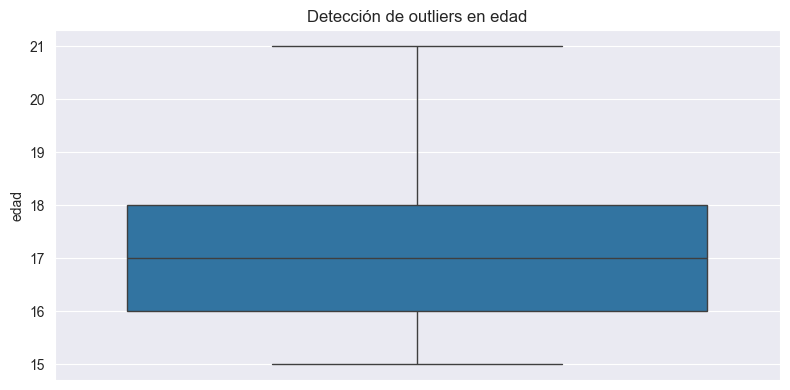

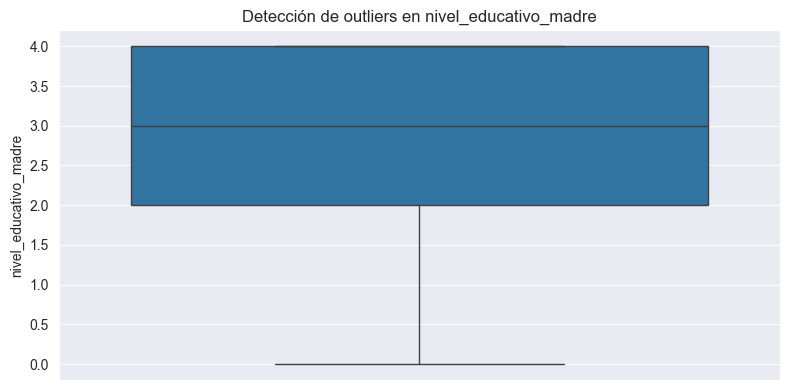

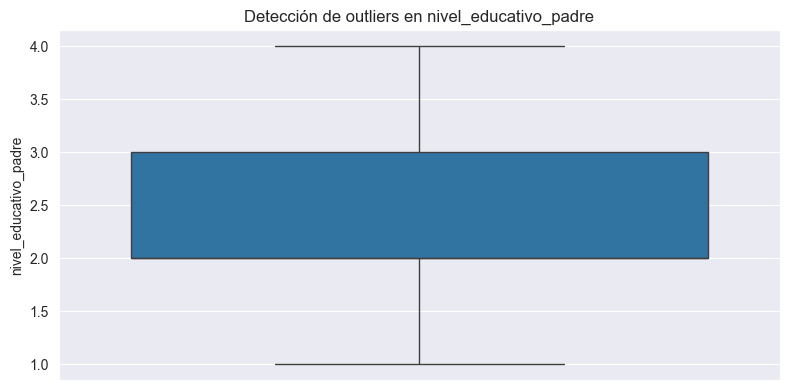

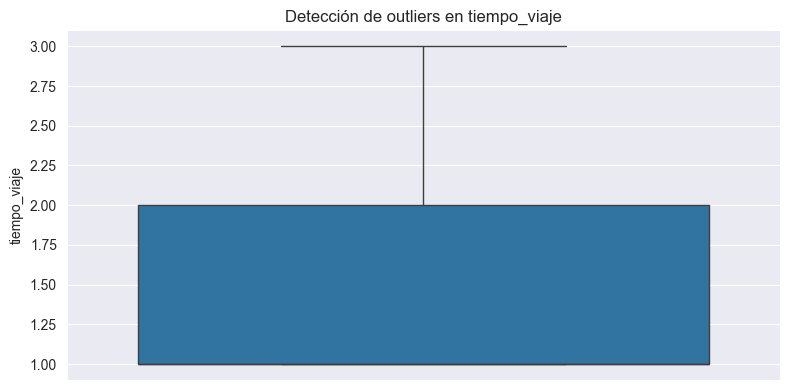

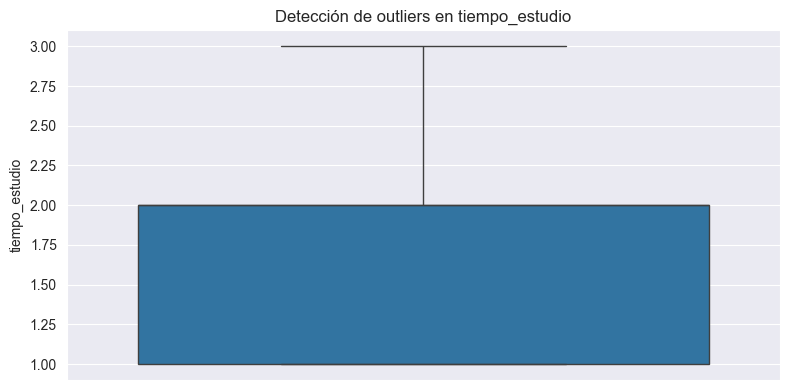

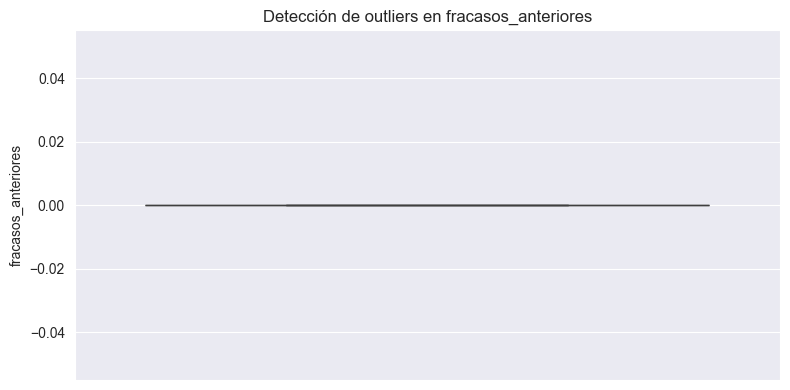

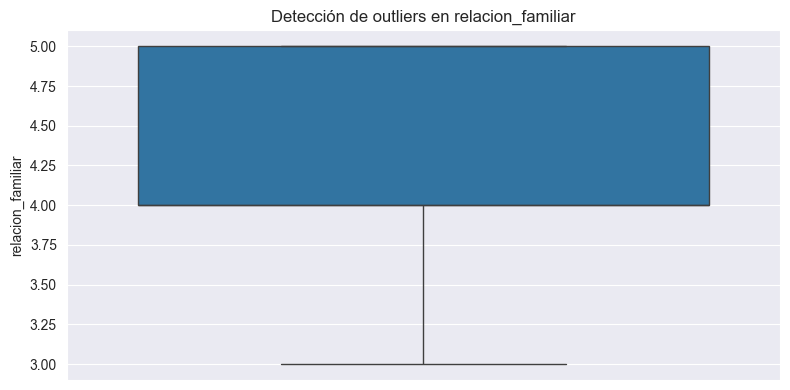

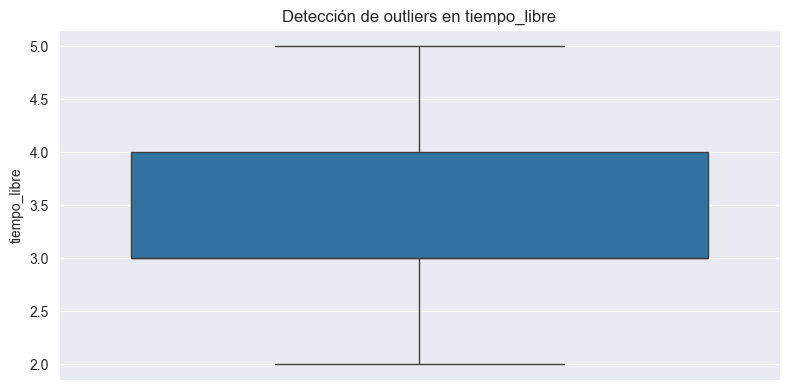

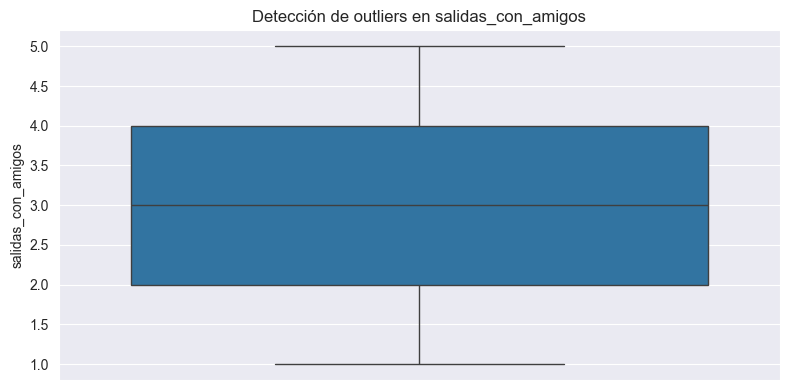

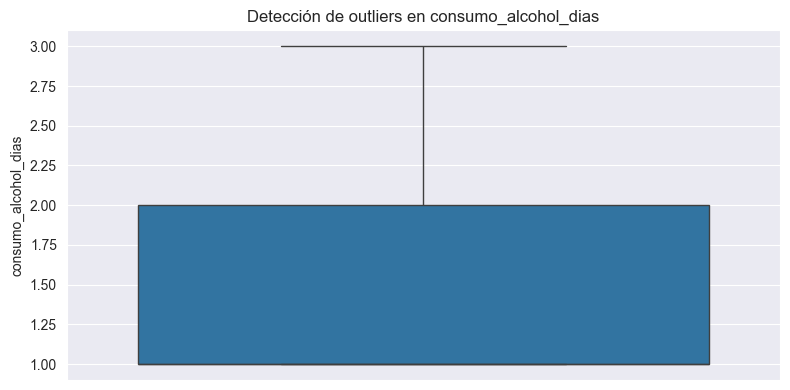

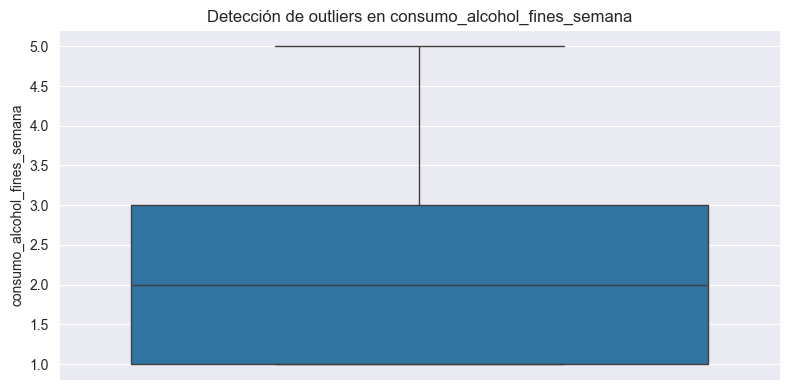

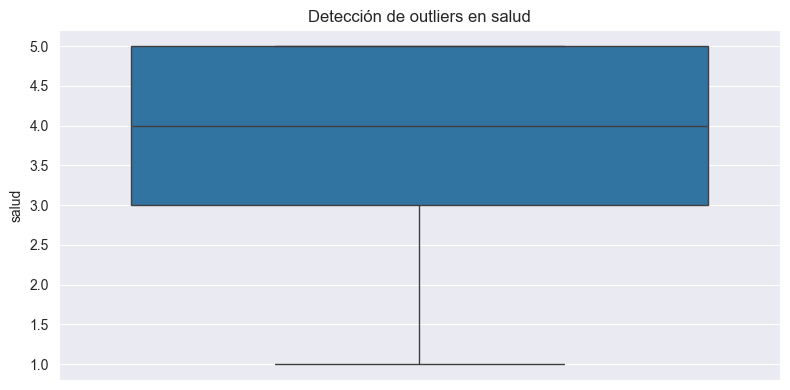

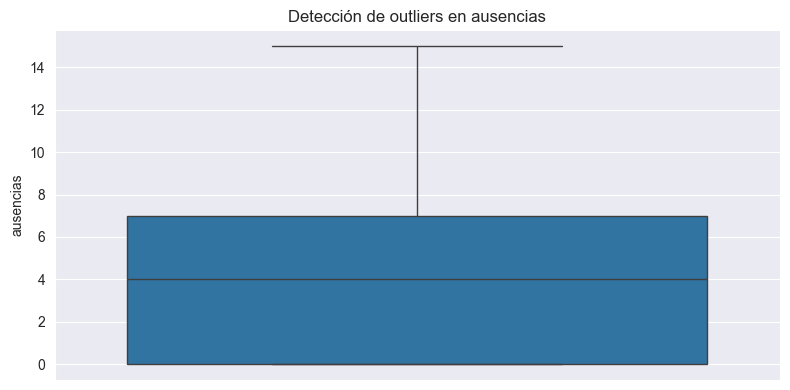

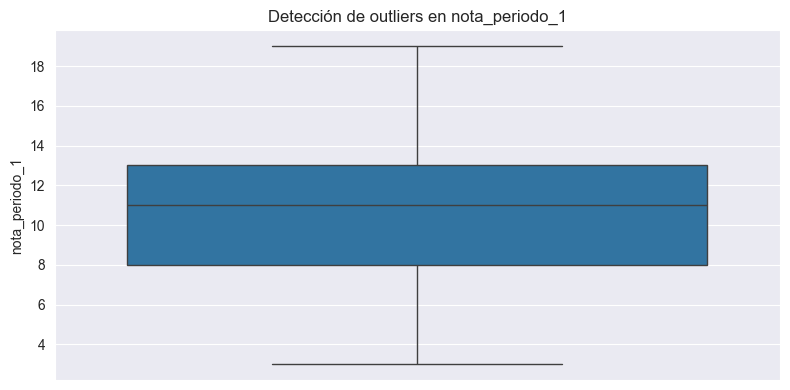

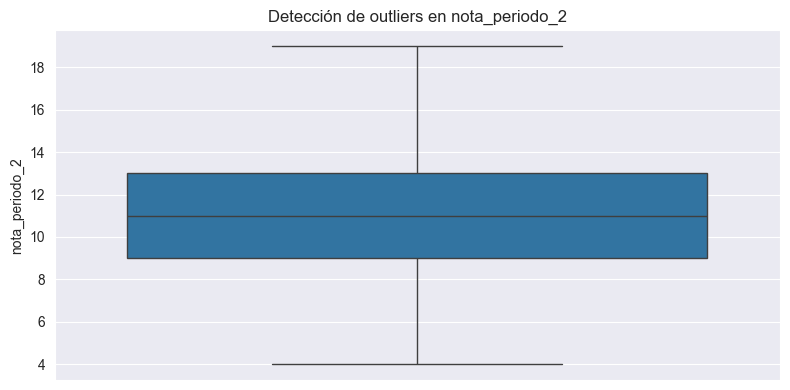

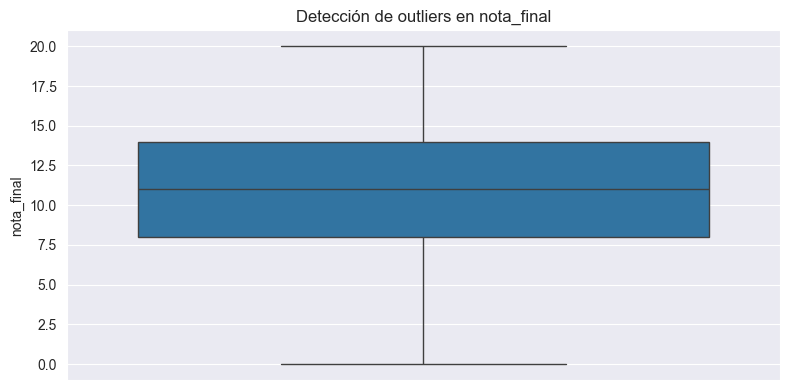

In [83]:
# Boxplot para detección de outliers
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, y=col)
    plt.title(f'Detección de outliers en {col}')
    plt.tight_layout()
    plt.show()

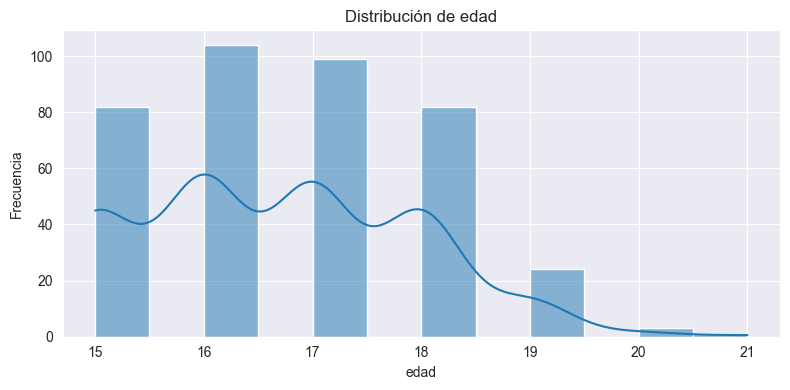

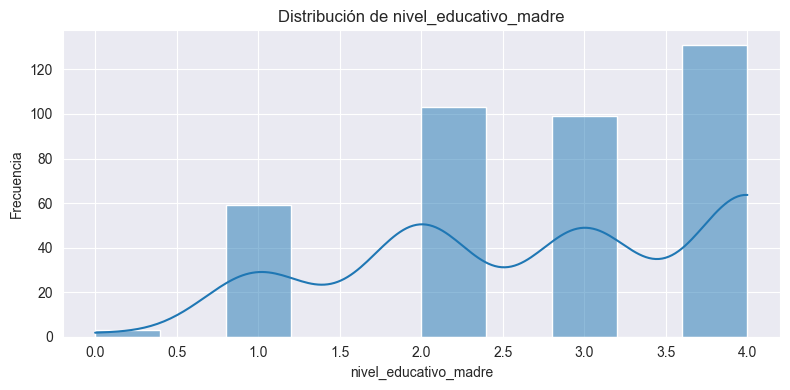

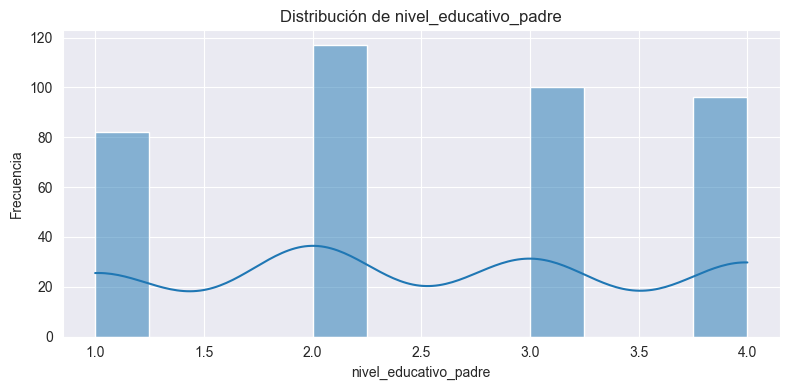

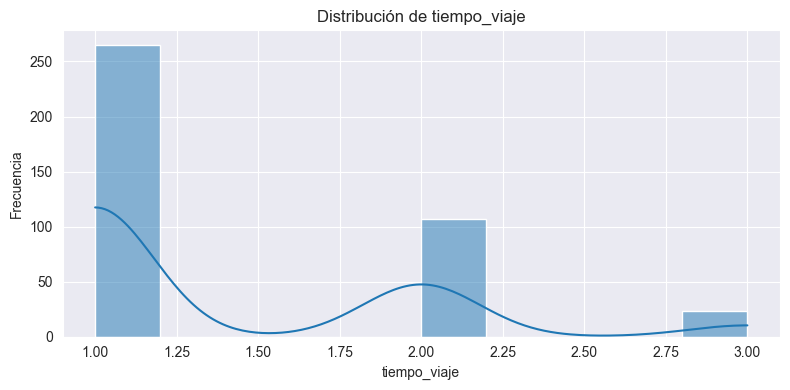

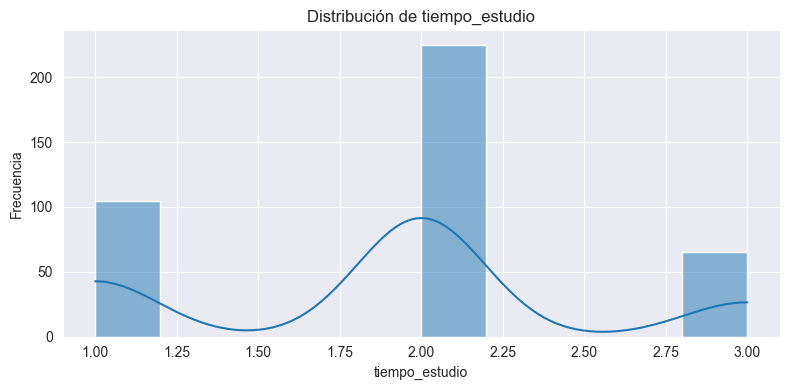

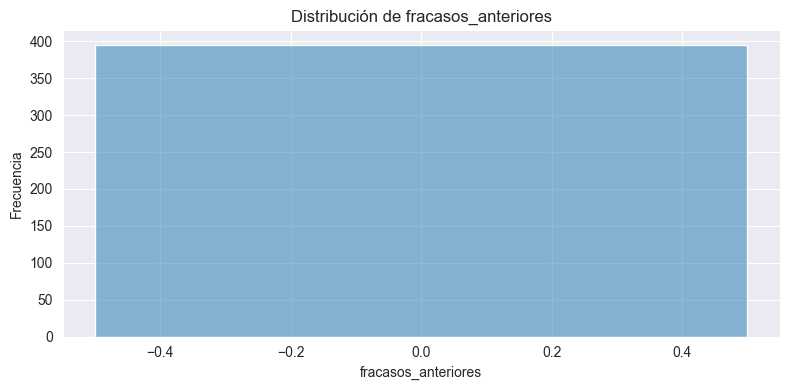

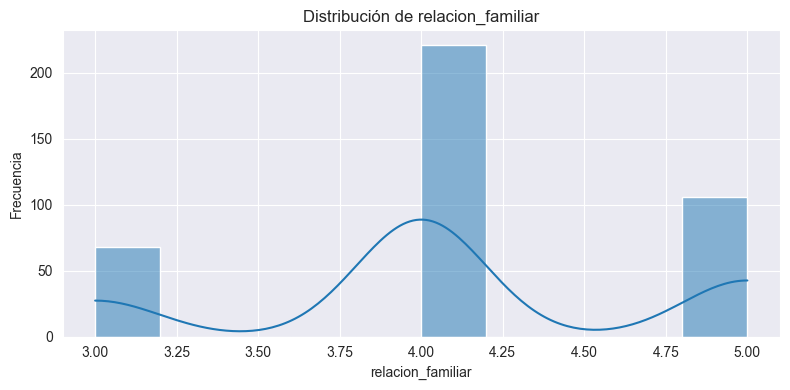

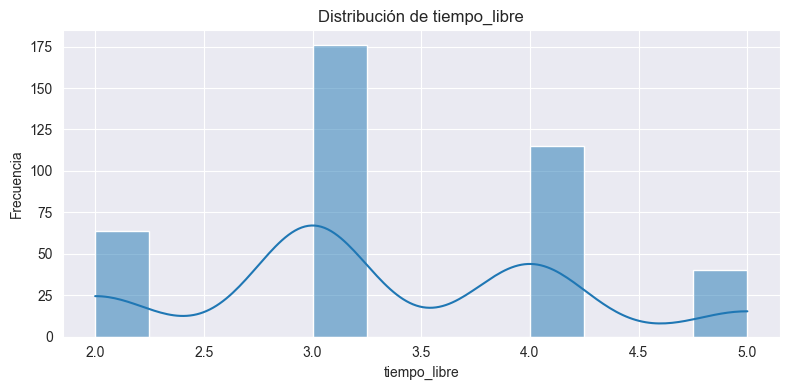

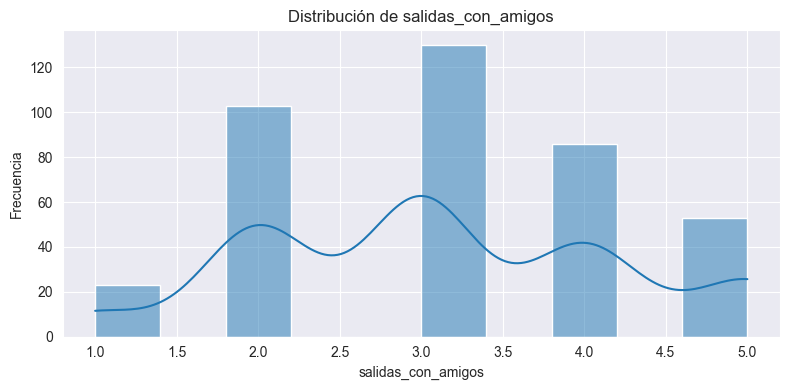

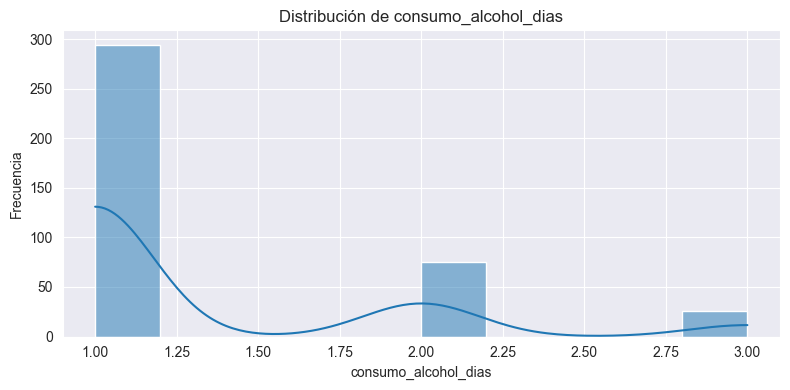

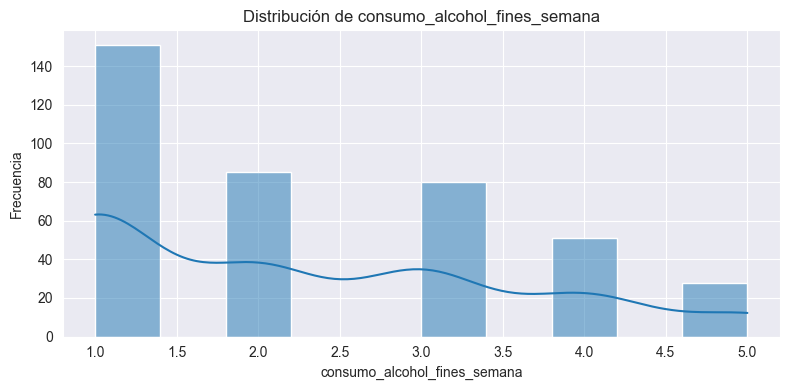

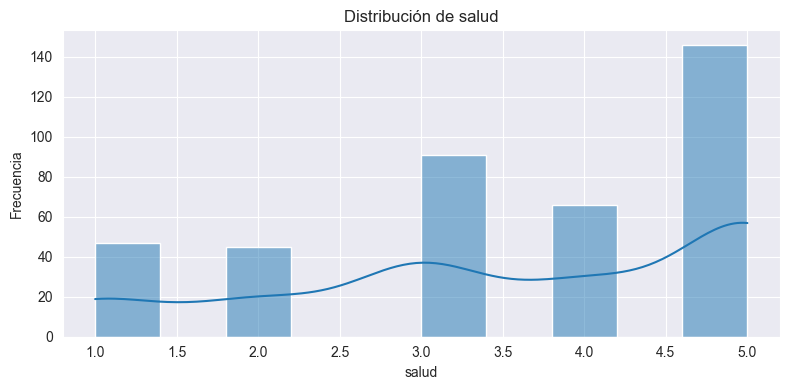

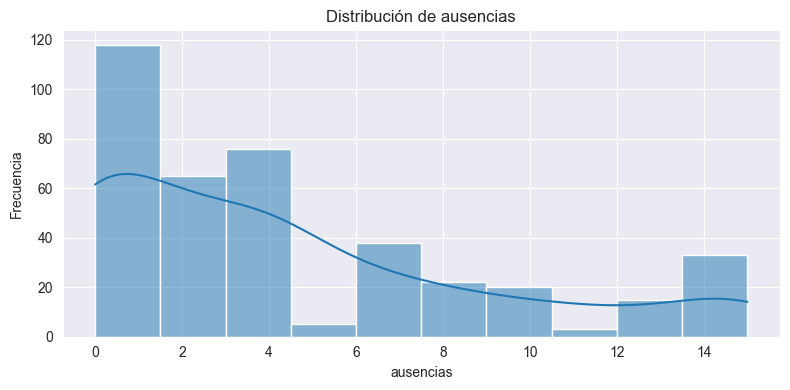

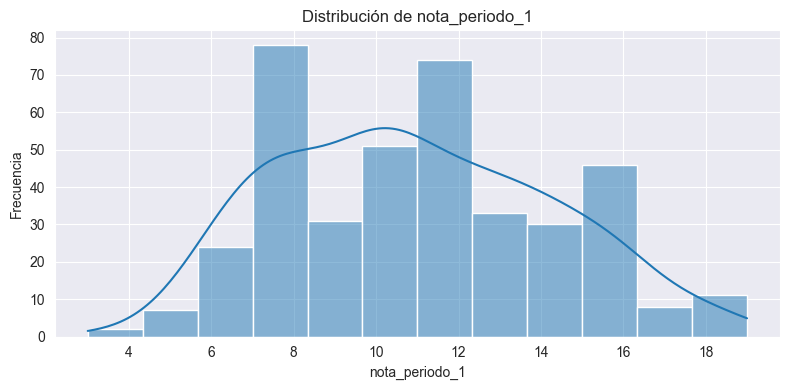

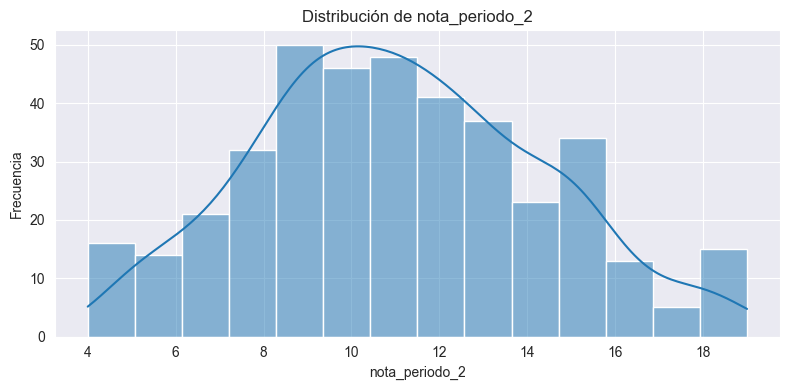

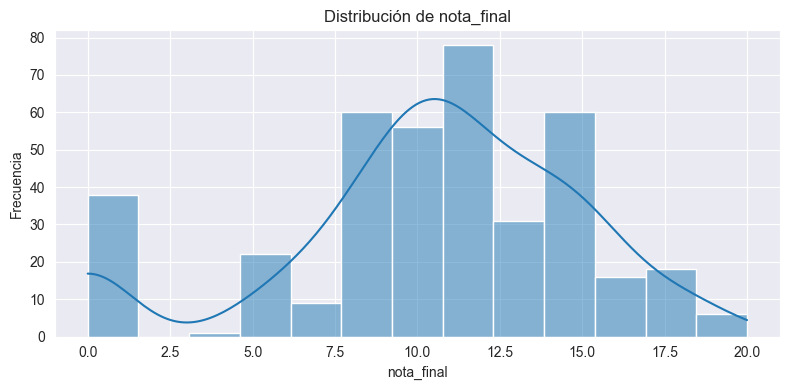

In [84]:
# Graficar distribuciones
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.tight_layout()
    plt.show()

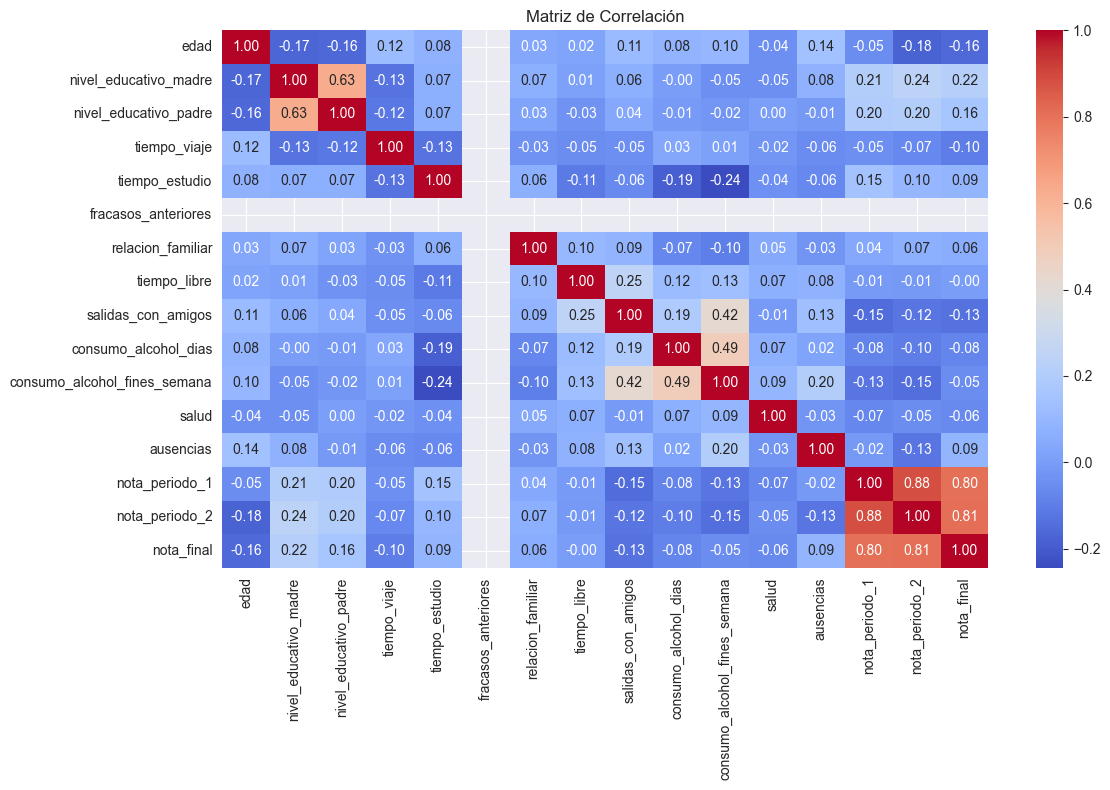

In [86]:
# Matriz de correlación
plt.figure(figsize=(12, 8))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación")
plt.tight_layout()
plt.show()

In [89]:
from sklearn.preprocessing import MinMaxScaler

# Normalización de los datos
columnas_a_normalizar = df.select_dtypes(include=['int64', 'float64']).columns
scaler = MinMaxScaler()
df[columnas_a_normalizar] = scaler.fit_transform(df[columnas_a_normalizar])

In [90]:
df

,escuela,sexo,edad,direccion,tamano_familia,estado_parental,nivel_educativo_madre,nivel_educativo_padre,trabajo_madre,trabajo_padre,...,relacion_familiar,tiempo_libre,salidas_con_amigos,consumo_alcohol_dias,consumo_alcohol_fines_semana,salud,ausencias,nota_periodo_1,nota_periodo_2,nota_final
0,GP,F,0.500000,U,GT3,A,1.00,1.000000,at_home,teacher,...,0.5,0.333333,0.75,0.0,0.00,0.50,0.400000,0.1250,0.133333,0.30
1,GP,F,0.333333,U,GT3,T,0.25,0.000000,at_home,other,...,1.0,0.333333,0.50,0.0,0.00,0.50,0.266667,0.1250,0.066667,0.30
2,GP,F,0.000000,U,LE3,T,0.25,0.000000,at_home,other,...,0.5,0.333333,0.25,0.5,0.50,0.50,0.666667,0.2500,0.266667,0.50
3,GP,F,0.000000,U,GT3,T,1.00,0.333333,health,services,...,0.0,0.000000,0.25,0.0,0.00,1.00,0.133333,0.7500,0.666667,0.75
4,GP,F,0.166667,U,GT3,T,0.75,0.666667,other,other,...,0.5,0.333333,0.25,0.0,0.25,1.00,0.266667,0.1875,0.400000,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,0.833333,U,LE3,A,0.50,0.333333,services,services,...,1.0,1.000000,0.75,0.0,1.00,0.75,0.733333,0.3750,0.333333,0.45
391,MS,M,0.333333,U,LE3,T,0.75,0.000000,services,services,...,0.5,0.666667,1.00,1.0,0.75,0.25,0.200000,0.6875,0.800000,0.80
392,MS,M,1.000000,R,GT3,T,0.25,0.000000,other,other,...,1.0,1.000000,0.50,1.0,0.50,0.50,0.200000,0.4375,0.266667,0.35
393,MS,M,0.500000,R,LE3,T,0.75,0.333333,services,other,...,0.5,0.666667,0.00,1.0,0.75,1.00,0.000000,0.5000,0.533333,0.50


In [92]:
df.to_csv(r'C:\Users\james\OneDrive\Documentos\PREGRADO UPAO\CICLO 9\Tesis I\Proyecto\BackEnds\EduForge\data\student_data_preprocesado.csv', index=False)